# Import Libraries

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

# Load Dataset(csv)

In [88]:
df_movies=pd.read_csv('movies.csv',na_values=['\n'])
df_movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


# Clean the Dataset

In [91]:
# Rename the column names 
df_movies.rename(columns={'RunTime':'RUNTIME','Gross':'GROSS'},inplace=True)
# Check the missing values
df_movies.isnull()
# Fill the missing value
df_movies[['RATING','VOTES','RUNTIME','GROSS']]=df_movies[['RATING','VOTES','RUNTIME','GROSS']].fillna(0)
# Drop the rows having missing values and dulpicate rows
df_movies.dropna(inplace=True)
df_movies.drop_duplicates(subset=['MOVIES'],inplace=True)
# Converting type of data
df_movies.VOTES=df_movies.VOTES.astype(str).str.replace(r'(,)', '.', regex=True)
df_movies.VOTES=df_movies.VOTES.astype(str).str.extract(r'(\d+\.\d+|\d+)')
df_movies.VOTES=pd.to_numeric(df_movies['VOTES'],errors='coerce')
df_movies.GROSS=df_movies.GROSS.astype(str).str.extract(r'(\d+\.\d+|\d+)')
df_movies.GROSS=pd.to_numeric(df_movies['GROSS'],errors='coerce')
# Again fill the missing values if any
df_movies[['RATING','VOTES','RUNTIME','GROSS']]=df_movies[['RATING','VOTES','RUNTIME','GROSS']].fillna(0)

# Reset the index of dataframe
df_movies.reset_index(drop=True,inplace=True)
df_movies

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RUNTIME,GROSS
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,21.062,121.0,0.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...",17.870,25.0,0.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885.805,44.0,0.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...",414.849,23.0,0.0
4,Army of Thieves,(2021),"\nAction, Crime, Horror",0.0,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6161,Master of None,(2015– ),"\nComedy, Drama",5.8,"\nNow a bestselling author, Denise leads a qui...",\n Director:\nAziz Ansari\n| \n Stars:\n...,1.173,55.0,0.0
6162,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",0.0,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,0.000,0.0,0.0
6163,AlRawabi School for Girls,(2021),\nDrama,0.0,\nAdd a Plot\n,\n Director:\nTima Shomali\n| \n Stars:\...,0.000,0.0,0.0
6164,Totenfrau,(2022– ),"\nDrama, Thriller",0.0,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,0.000,0.0,0.0


# Type Conversion(to_datetime)

In [94]:
# Convert YEAR column to datetime type 
df_year_ext=df_movies.YEAR.astype(str).str.extract(r'(\d{4})')

df_year_ext[0]=df_year_ext[0].fillna(0)
df_movies.YEAR=pd.to_datetime(df_year_ext[0],format='%Y',errors='coerce').dt.year
df_movies

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RUNTIME,GROSS
0,Blood Red Sky,2021.0,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,21.062,121.0,0.0
1,Masters of the Universe: Revelation,2021.0,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...",17.870,25.0,0.0
2,The Walking Dead,2010.0,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885.805,44.0,0.0
3,Rick and Morty,2013.0,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...",414.849,23.0,0.0
4,Army of Thieves,2021.0,"\nAction, Crime, Horror",0.0,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6161,Master of None,2015.0,"\nComedy, Drama",5.8,"\nNow a bestselling author, Denise leads a qui...",\n Director:\nAziz Ansari\n| \n Stars:\n...,1.173,55.0,0.0
6162,The Imperfects,2021.0,"\nAdventure, Drama, Fantasy",0.0,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,0.000,0.0,0.0
6163,AlRawabi School for Girls,2021.0,\nDrama,0.0,\nAdd a Plot\n,\n Director:\nTima Shomali\n| \n Stars:\...,0.000,0.0,0.0
6164,Totenfrau,2022.0,"\nDrama, Thriller",0.0,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,0.000,0.0,0.0


# Checking the Unique items in Year column 

In [97]:
df_movies.YEAR.unique()


array([2021., 2010., 2013., 2020., 2006., 2019., 2016., 2011., 2005.,
       2008., 2017., 1994., 2014., 2015., 2003., 2009., 2018., 1987.,
       2012., 2007., 2000., 1993., 1999., 2001., 1997., 1989., 1975.,
       1995., 1984., 1998., 1966., 1990., 2002., 1976., 1978., 2022.,
       1982., 1968., 2004., 1996., 1971., 1980., 1962., 1960., 1988.,
       1969., 1961., 1979., 1956., 1983., 1986., 1967., 1974.,   nan,
       1992., 1958., 1932., 1941., 1991., 1950., 1981., 1952., 1957.,
       1954., 1955., 1948., 1947., 1946., 1977., 2023., 1945., 1953.,
       1985., 1973., 1972., 1965., 1944., 1933., 1938.])

# Groupby Year


In [100]:
grouped=df_movies.groupby('YEAR')['MOVIES'].count()
grouped_df=grouped.reset_index(name='Count')
grouped_df

,YEAR,Count
0,1932.0,2
1,1933.0,1
2,1938.0,1
3,1941.0,1
4,1944.0,1
...,...,...
73,2019.0,808
74,2020.0,871
75,2021.0,553
76,2022.0,73


# Data filtering for visualization

In [103]:
gr_1950=grouped_df.loc[grouped_df['YEAR']<=1950]['Count'].sum()
gr_1970=grouped_df.loc[(grouped_df['YEAR']>1950) & (grouped_df['YEAR']<=1970)]['Count'].sum()
gr_2000=grouped_df.loc[(grouped_df['YEAR']>1970) & (grouped_df['YEAR']<=2000)]['Count'].sum()
gr_2010=grouped_df.loc[(grouped_df['YEAR']>2000) & (grouped_df['YEAR']<=2010)]['Count'].sum()
gr_2021=grouped_df.loc[(grouped_df['YEAR']>2010) & (grouped_df['YEAR']<=2021)]['Count'].sum()
year_list=['1932-1950','1950-1970','1970-2000','2000-2010','2010-2021']
gr_count_list=[gr_1950,gr_1970,gr_2000,gr_2010,gr_2021]


# Data Visualization

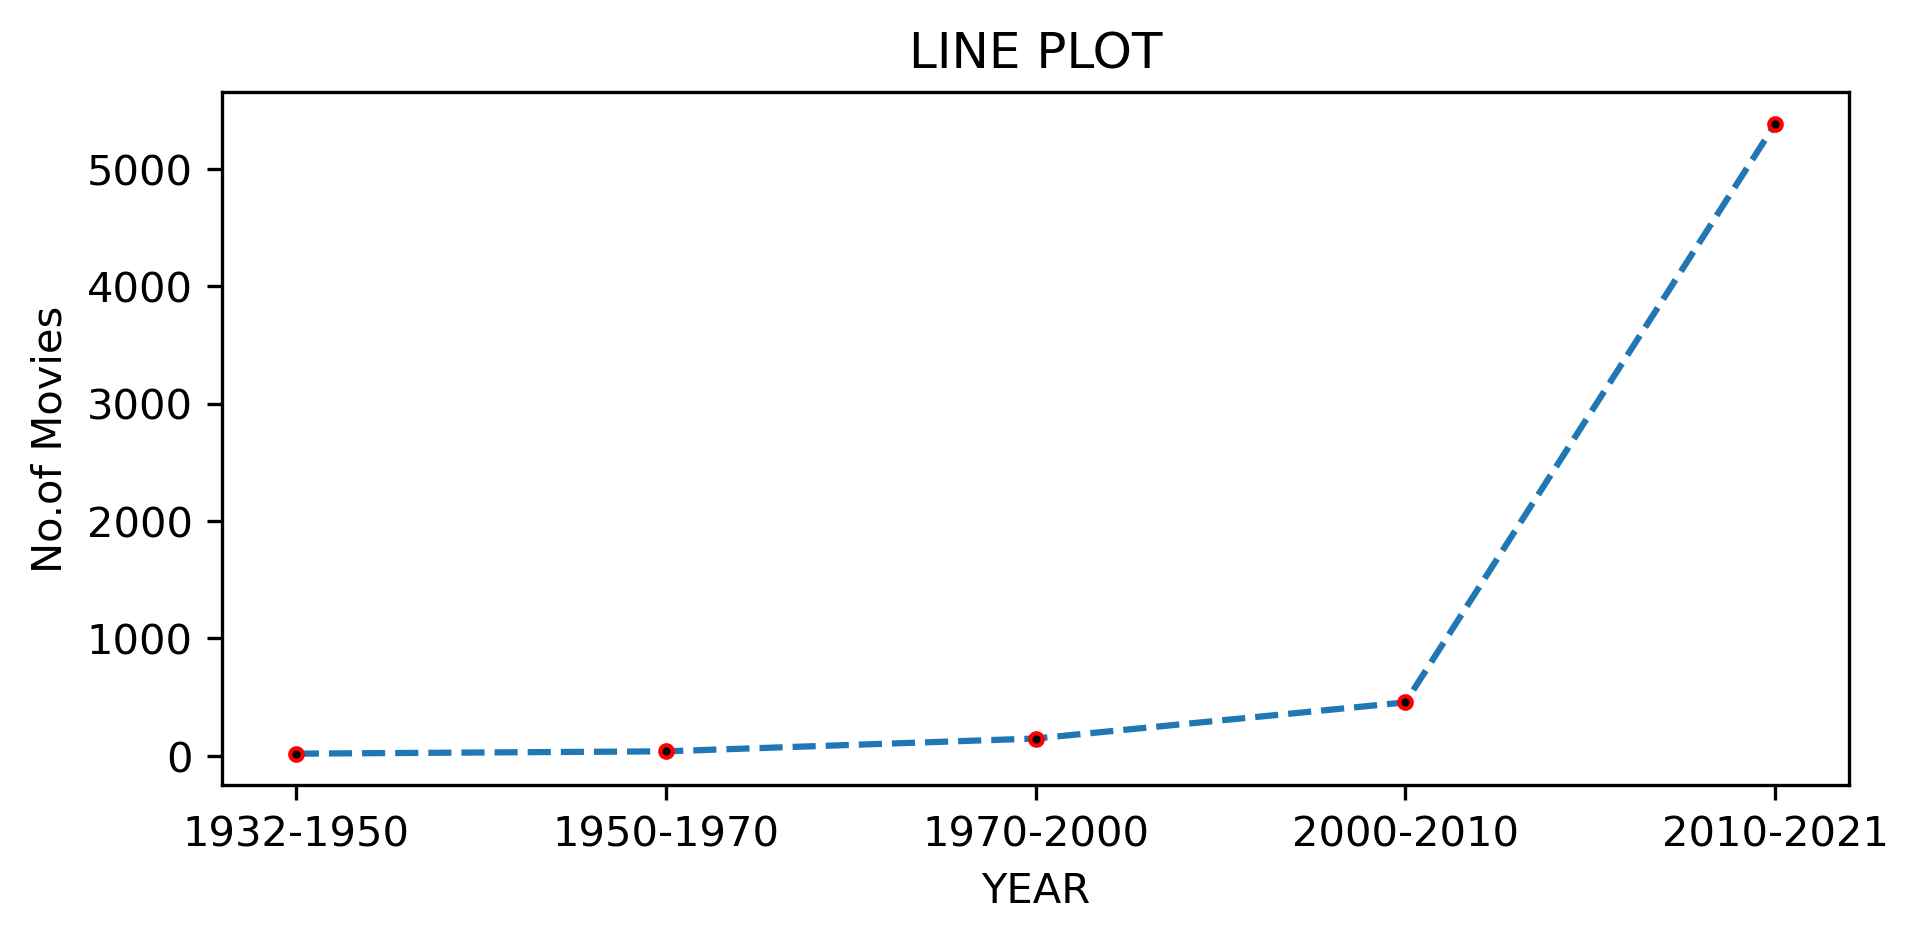

In [106]:
plt.figure(figsize=(7,3),dpi=300)
plt.plot(year_list,gr_count_list,'.--',markerfacecolor='black',markeredgecolor='red')
plt.title('LINE PLOT')
plt.xlabel('YEAR')
plt.ylabel('No.of Movies')
plt.savefig('Lineplot of movies-y.png')
plt.show()

# Movie has highest rating

In [109]:
movie_df=df_movies.groupby('MOVIES')['RATING'].max()
movie_df=movie_df.reset_index(name='RATING')
movie_h_rating=movie_df.nlargest(1,'RATING')
print(movie_h_rating.reset_index(drop=True))


         MOVIES  RATING
0  Breaking Bad     9.4


# TOP 5 Movies

In [112]:
top_movies=movie_df.sort_values('RATING',ascending=False).head(5).reset_index(drop=True)
top_movies

,MOVIES,RATING
0,Breaking Bad,9.4
1,Cosmos: A Spacetime Odyssey,9.3
2,Avatar: The Last Airbender,9.3
3,Our Planet,9.3
4,Rick and Morty,9.2


# Export Dataset as csv

In [115]:
df_movies.to_csv('Movies_Cleaned_df.csv',index=False)

# Scale Dataframe

In [118]:
df_movies[['VOTES','RUNTIME','GROSS']]=scaler.fit_transform(df_movies[['VOTES','RUNTIME','GROSS']])
df_movies

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RUNTIME,GROSS
0,Blood Red Sky,2021.0,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,0.021083,0.141852,0.0
1,Masters of the Universe: Revelation,2021.0,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...",0.017888,0.029308,0.0
2,The Walking Dead,2010.0,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",0.886692,0.051583,0.0
3,Rick and Morty,2013.0,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...",0.415264,0.026964,0.0
4,Army of Thieves,2021.0,"\nAction, Crime, Horror",0.0,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
6161,Master of None,2015.0,"\nComedy, Drama",5.8,"\nNow a bestselling author, Denise leads a qui...",\n Director:\nAziz Ansari\n| \n Stars:\n...,0.001174,0.064478,0.0
6162,The Imperfects,2021.0,"\nAdventure, Drama, Fantasy",0.0,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,0.000000,0.000000,0.0
6163,AlRawabi School for Girls,2021.0,\nDrama,0.0,\nAdd a Plot\n,\n Director:\nTima Shomali\n| \n Stars:\...,0.000000,0.000000,0.0
6164,Totenfrau,2022.0,"\nDrama, Thriller",0.0,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,0.000000,0.000000,0.0


# Export scaled Dataset

In [121]:
df_movies.to_csv('Movies_Cleaned&scaled_df.csv',index=False)